In [1]:
%matplotlib inline

# CSG Survey Data Analysis

For this survey we received 219 responses.

In [2]:
import os
import collections
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
file_path = 'bias-1'
in_file = 'bias_data_csv.csv'

In [3]:
def create_heatmap_from_matrix(matrix_name, filename, color='Blues'):
    sns.set(rc={"figure.figsize":(12,8)})
    df = pd.DataFrame(matrix_name)
    g = sns.heatmap(df, annot=True, fmt='g', cmap=color)
    g.get_figure().savefig(os.path.join(file_path, filename))

In [4]:
def create_stackedbar_chart(matrix, filename):
        matrix.plot.bar(stacked=True)#.patch.set_visible(False)
        plt.savefig(os.path.join(file_path, filename))

In [5]:
def bias1_report_data(input_file):
    ''''''
    csv_data = pd.read_csv(input_file, sep='\t')
    femalebias_target_info = csv_data.groupby([
        'gender', 'nationality2', 'residence2',
        'femalebias_target'])
    malebias_target_info = csv_data.groupby([
        'gender','nationality2', 'residence2',
        'malebias_target'])
    all_target_info = csv_data.groupby([
        'nationality2', 'residence2',
        'all_bias_target'])
    femalebias_witness_info = csv_data.groupby([
        'gender','nationality2', 'residence2',
        'femalebias_witness'])
    malebias_witness_info = csv_data.groupby([
        'gender','nationality2', 'residence2',
        'malebias_witness'])
    all_witness_info = csv_data.groupby([
        'nationality2', 'residence2',
        'all_bias_witness'])
    return (femalebias_target_info, 
            malebias_target_info, 
            all_target_info,
            femalebias_witness_info, 
            malebias_witness_info, 
            all_witness_info)

bias_target_report_info = bias1_report_data(in_file)

In [6]:
def bias_metadata(input_file):
    csv_data = pd.read_csv(input_file, sep='\t')
    # Merge target and witness data
    # check where does this occur
    # normalize? because our data is skewed to the inductry

In [7]:
def get_column_stat(input_file, column):
    csv_data = pd.read_csv(input_file, sep='\t')
    select_column = csv_data[column].replace('na', np.nan).dropna()
    return select_column

In [8]:
def viz_biastype_info(biastype_data, filename, threshold=5, color='Grey'):
    biastype_dict = collections.defaultdict(list)
    main_bias_dict = {}
    other_bias_dict = {}
    bias_key_list = []
    bias_value_list = []
    for entry in biastype_data:
        if ',' in entry:
            for each in entry.split(','):
                biastype_dict[each.strip()].append(1)
        else:
            biastype_dict[entry].append(1)
    for key in biastype_dict.keys():
        if len(biastype_dict[key]) > threshold:
            main_bias_dict[key] = len(biastype_dict[key])
        else:
            other_bias_dict[key] = len(biastype_dict[key])
    for bias_key in sorted(main_bias_dict, key=main_bias_dict.get, reverse=True):
        bias_key_list.append(bias_key)
        bias_value_list.append(main_bias_dict[bias_key])
    df = pd.DataFrame({'BiasTypes':bias_key_list, 
                       '#SurveyTakers':bias_value_list})
    ax = df.plot.bar(x='BiasTypes', y='#SurveyTakers', color=color)
    plt.savefig(os.path.join(file_path, filename))
    return main_bias_dict, other_bias_dict

# Data analysis for the responses categorised in the section "Bias I"

Here we analyse two sets of survey response data:

1. If our survey responders experienced bias at their workplace from their colleagues
1. If our survey responders witnessed bias at their workplace from their colleagues

We have combined the responses to non-gender specifically identify such bias based on their nationality and country of residence. Furthermore, we have separately analyzed gender specific datasets as shown below.

Total response for this analysis is 217.0


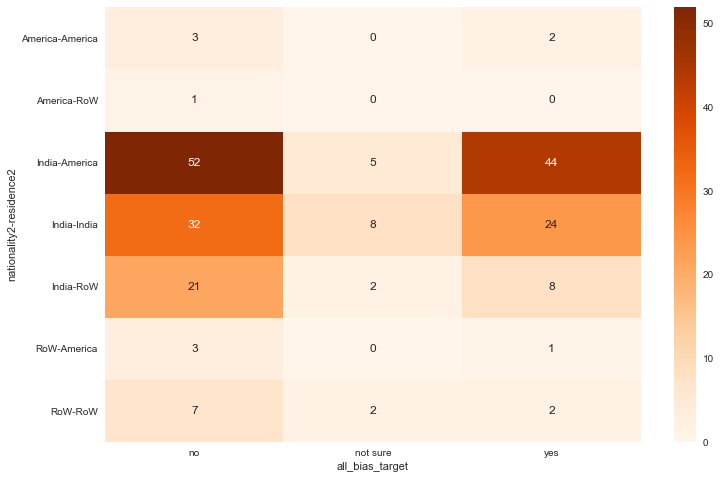

In [9]:
all_target = bias_target_report_info[2].size().drop(
    ['na','Do not wish to answer'], level = 1-2).unstack().fillna(0)
all_target_perc = round(all_target*(100/all_target.sum().sum()), 3)
create_heatmap_from_matrix(all_target, "all_target_number.png", color='Oranges')
print(f'Total response for this analysis is {all_target.sum().sum()}')

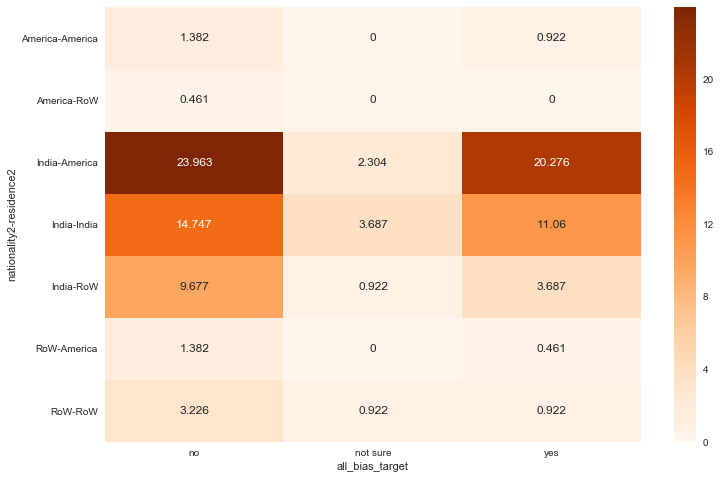

In [10]:
create_heatmap_from_matrix(all_target_perc, "all_target_perc.png", color='Oranges')

The heatmap above summarizes the *non-gender specific responses* for **researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **experienced any bias in their workplace from their colleagues**. Please note that among the survey takers, 

Total response for this analysis is 139.0


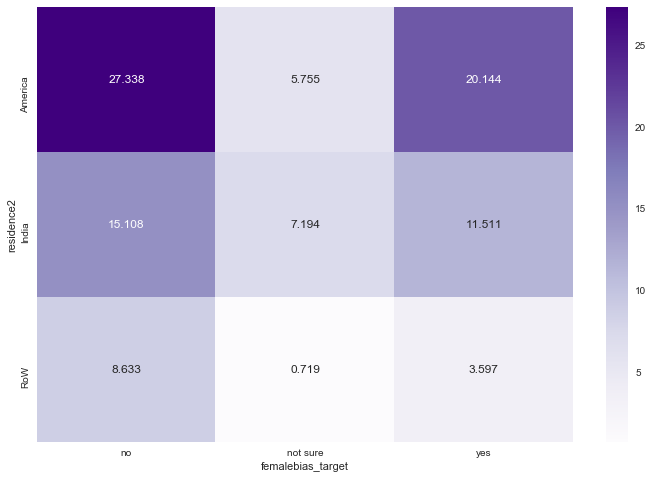

In [11]:
indian_female_target_female = bias_target_report_info[0].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Female']['India'].unstack().fillna(0)
indian_female_target_female_perc = round(indian_female_target_female*(
    100/indian_female_target_female.sum().sum()), 3)
create_heatmap_from_matrix(indian_female_target_female_perc, 
                           "indian_female_target_female.png", color='Purples')
print(f'Total response for this analysis is {indian_female_target_female.sum().sum()}')

The heatmap above summarizes the responses for **Indian female researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **experienced any bias in their workplace from other female colleagues**.

Total response for this analysis is 48.0


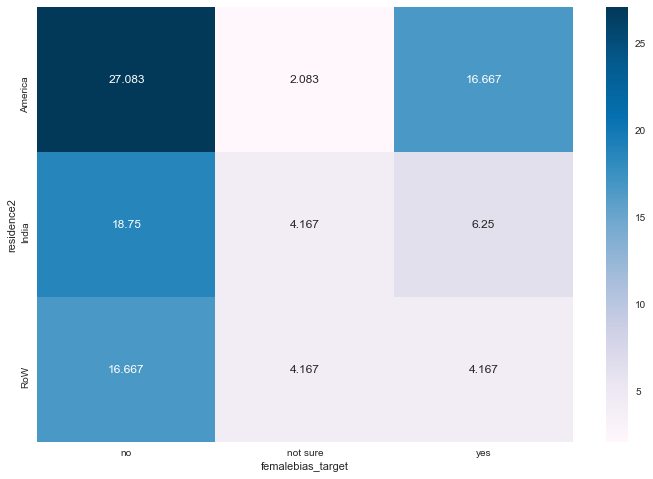

In [12]:
indian_female_target_male = bias_target_report_info[0].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Male']['India'].unstack().fillna(0)
indian_female_target_male_perc = round(indian_female_target_male*(
    100/indian_female_target_male.sum().sum()), 3)
create_heatmap_from_matrix(indian_female_target_male_perc,
                           "indian_female_target_male.png", color='PuBu')
print(f'Total response for this analysis is {indian_female_target_male.sum().sum()}')

The heatmap above summarizes the responses for **Indian male researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **experienced any bias in their workplace from other female colleagues**.

Total response for this analysis is 143.0


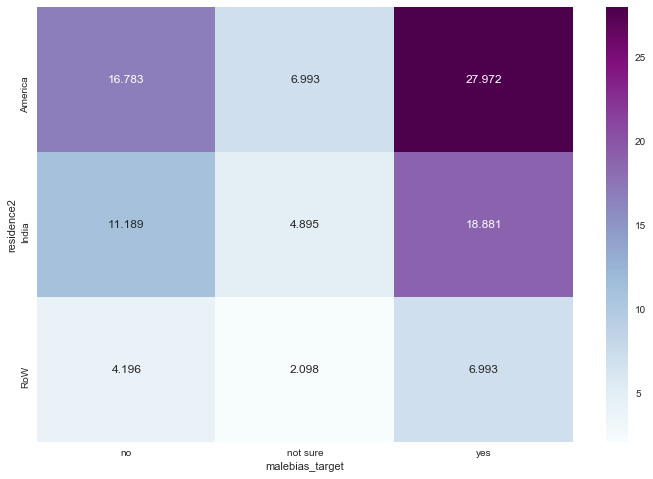

In [13]:
indian_male_target_female = bias_target_report_info[1].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Female']['India'].unstack().fillna(0)
indian_male_target_female_perc = round(indian_male_target_female*(
    100/indian_male_target_female.sum().sum()), 3)
create_heatmap_from_matrix(indian_male_target_female_perc, 
                           "indian_male_target_female.png", color='BuPu')
print(f'Total response for this analysis is {indian_male_target_female.sum().sum()}')

The heatmap above summarizes the responses for **Indian female researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **experienced any bias in their workplace from their male colleagues**.

Total response for this analysis is 51.0


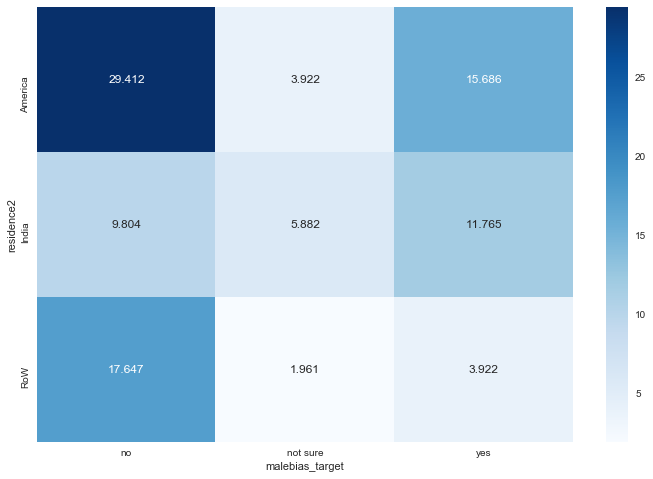

In [14]:
indian_male_target_male = bias_target_report_info[1].size()[
    'Male']['India'].unstack().fillna(0)
indian_male_target_male_perc = round(indian_male_target_male*(
    100/indian_male_target_male.sum().sum()), 3)
create_heatmap_from_matrix(indian_male_target_male_perc, 
                           "indian_male_target_male.png")
print(f'Total response for this analysis is {indian_male_target_male.sum().sum()}')

The heatmap above summarizes the responses for **Indian male researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **experienced any bias in their workplace from other male colleagues**.

Total response for this analysis is 215.0


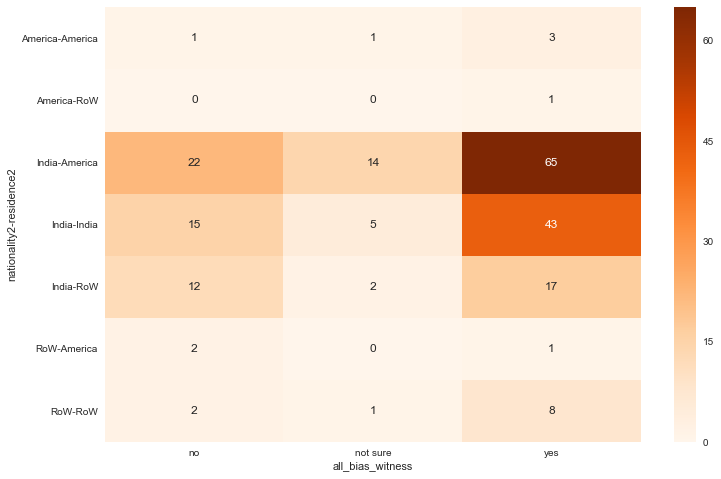

In [15]:
all_witness = bias_target_report_info[-1].size().drop(
    ['na','Do not wish to answer'], level = 1-2).unstack().fillna(0)
create_heatmap_from_matrix(all_witness,"all_witness.png", color='Oranges')
print(f'Total response for this analysis is {all_witness.sum().sum()}')

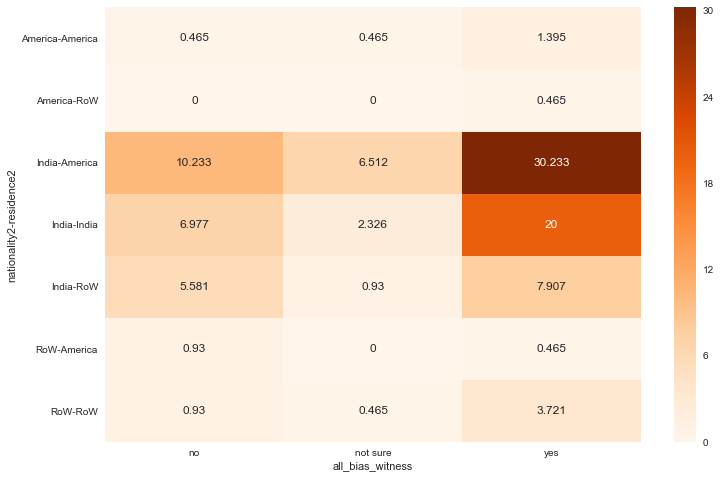

In [16]:
all_witness_perc = round(all_witness*(100/all_witness.sum().sum()), 3)
create_heatmap_from_matrix(all_witness_perc, "all_witness_perc.png", color='Oranges')

The heatmap above summarizes the *non-gender specific responses* for **researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **witnessed any bias in their workplace from their colleagues**.

Total response for this analysis is 141.0


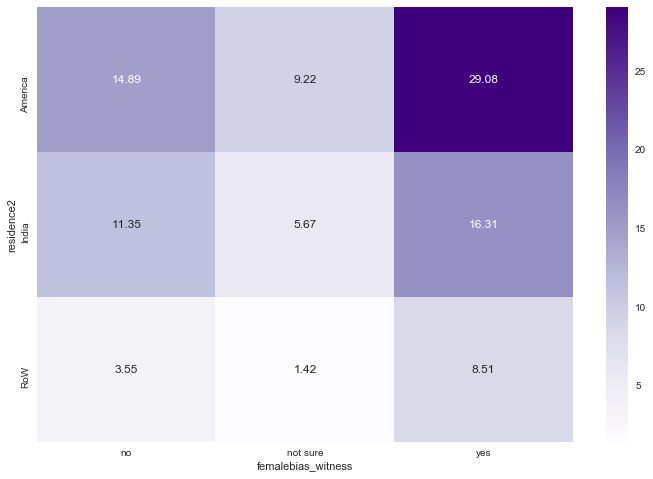

In [17]:
indian_femalebias_witness_female = bias_target_report_info[3].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Female']['India'].unstack().fillna(0)
indian_femalebias_witness_female_perc = round(indian_femalebias_witness_female*(
    100/indian_femalebias_witness_female.sum().sum()), 2)
create_heatmap_from_matrix(indian_femalebias_witness_female_perc, 
                           "indian_femalebias_witness_female.png", color='Purples')
print(f'Total response for this analysis is {indian_femalebias_witness_female.sum().sum()}')

The heatmap above summarizes the responses for **Indian female researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **witnessed any bias in their workplace from other female colleagues**.

Total response for this analysis is 49.0


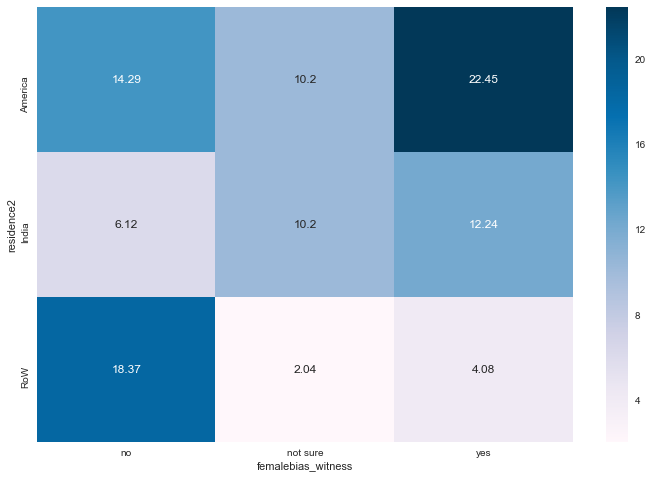

In [18]:
indian_femalebias_witness_male = bias_target_report_info[3].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Male']['India'].unstack().fillna(0)
indian_femalebias_witness_male_perc = round(indian_femalebias_witness_male*(
    100/indian_femalebias_witness_male.sum().sum()), 2)
create_heatmap_from_matrix(indian_femalebias_witness_male_perc, 
                           "indian_femalebias_witness_male.png", color='PuBu')
print(f'Total response for this analysis is {indian_femalebias_witness_male.sum().sum()}')

The heatmap above summarizes the responses for **Indian male researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **witnessed any bias in their workplace from their female colleagues**.

Total response for this analysis is 142.0


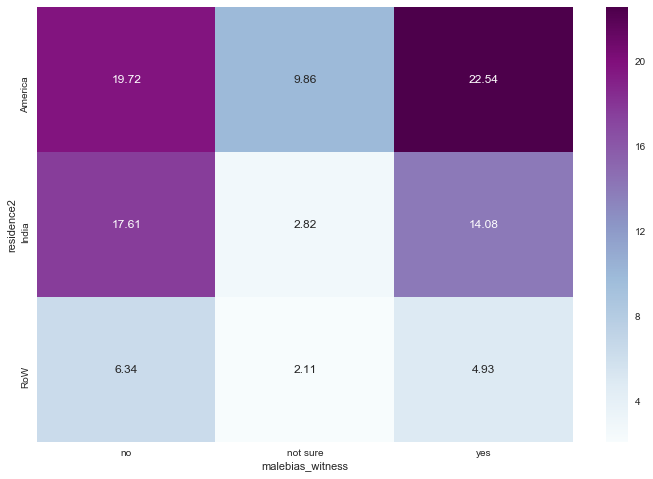

In [19]:
indian_malebias_witness_female = bias_target_report_info[4].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Female']['India'].unstack().fillna(0)
indian_malebias_witness_female_perc = round(indian_malebias_witness_female*(
    100/indian_malebias_witness_female.sum().sum()), 2)
create_heatmap_from_matrix(indian_malebias_witness_female_perc, 
                           "indian_malebias_witness_female.png", color='BuPu')
print(f'Total response for this analysis is {indian_malebias_witness_female.sum().sum()}')

The heatmap above summarizes the responses for **Indian female researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **witnessed any bias in their workplace from their male colleagues**.

Total response for this analysis is 50.0


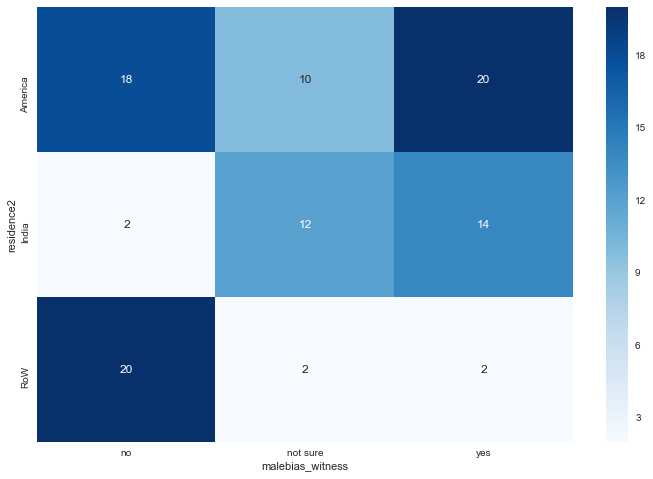

In [20]:
indian_malebias_witness_male = bias_target_report_info[4].size().drop(
    ['na','Do not wish to answer'], level = 1-2)[
    'Male']['India'].unstack().fillna(0)
indian_malebias_witness_male_perc = round(indian_malebias_witness_male*(
    100/indian_malebias_witness_male.sum().sum()), 2)
create_heatmap_from_matrix(indian_malebias_witness_male_perc, 
                           "indian_malebias_witness_male.png")
print(f'Total response for this analysis is {indian_malebias_witness_male.sum().sum()}')

The heatmap above summarizes the responses for **Indian male researchers** living in America (top row), India (middle row) and rest of the world (lower row), if they **witnessed any bias in their workplace from other male colleagues**.

Total 128 survey takers listed the following bias experienced at their workplace:
Mainly reported biases are: Gender Bias, Sexual harrassment, Emotional harrassment, Mental harrassment
Other biases reported by a small number of survey takers are Racism, Pay Gap, Bully, Physical harrassment, Exclusion, Pay gp, Unhealthy competition, Bias by hierarchy, Plagiarism, Favoritism


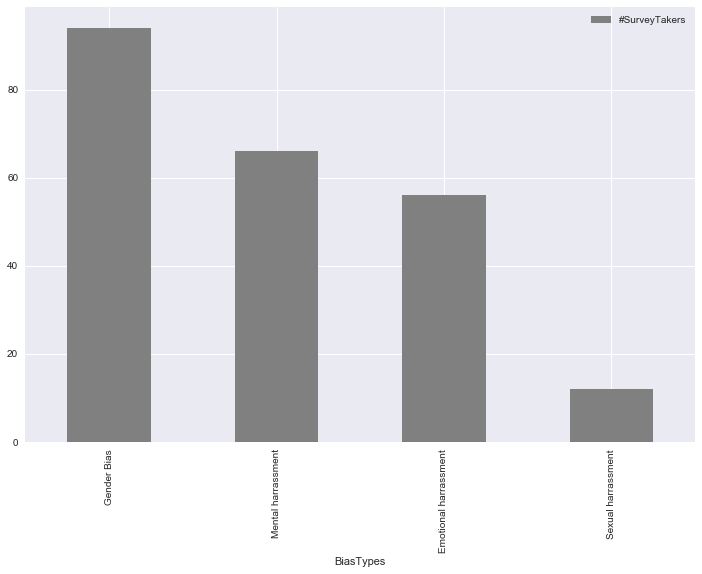

In [21]:
biastype_target = get_column_stat(in_file, 'biastype1')
print(f'Total {len(biastype_target)} survey takers listed'+ 
' the following bias experienced at their workplace:')
biastype_target_stat = viz_biastype_info(biastype_target, 'biastype_target.png')
print('Mainly reported biases are: %s' % ', '.join(biastype_target_stat[0].keys()))
print('Other biases reported by a small number of survey takers are %s' %
', '.join(biastype_target_stat[1].keys()))

Total 138 survey takers listed the following bias witnessed at their workplace:
Mainly reported biases are: Gender bias, Sexual harrassment, Emotional harrassment, Mental harrassment
Other biases reported by a small number of survey takers are Physical harrassment, Gender Bias, Maternity, Exclusion, Racism, Bias by hierarchy.


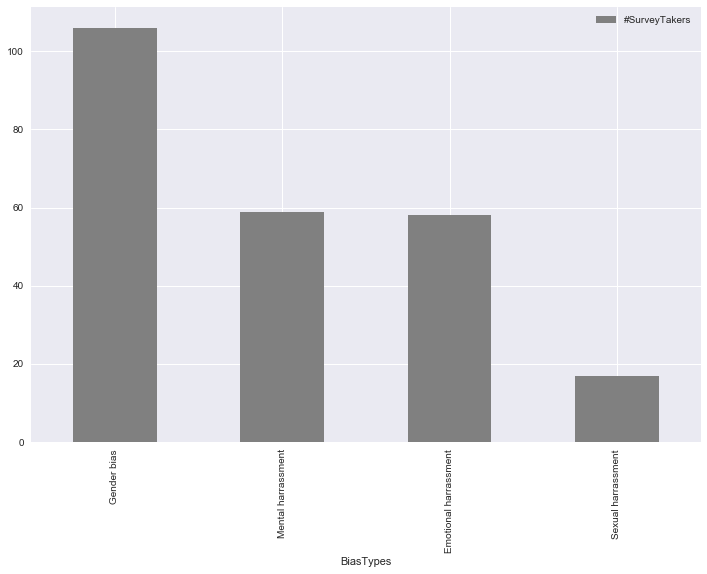

In [22]:
biastype_witness = get_column_stat(in_file, 'biastype2')
print(f'Total {len(biastype_witness)} survey takers listed'+ 
' the following bias witnessed at their workplace:')
biastype_witness_stat = viz_biastype_info(biastype_witness, 'biastype_witness.png')
print('Mainly reported biases are: %s' % ', '.join(biastype_witness_stat[0].keys()))
print('Other biases reported by a small number of survey takers are %s.' %
', '.join(biastype_witness_stat[1].keys()))